In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
print(df.apply(lambda x: sum(x.isnull()), axis = 0))
print(' ')

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
 


Feature Engineering:

In [4]:
#switch income values so they are numerical
df['income_level'] = np.where(df.income == '<=50K', 0, 1)

In [5]:
df['gender'] = df['sex'].map({'Male':0, 'Female':1}).astype(int)

In [6]:
#convert the race variable into numeric form by
#assigning each with a numeric value
ethnicity_key = {'White':0, 'Black':1, 'Asian-Pac-Islander':2,
'Amer-Indian-Eskimo':3, 'Other':4}

In [7]:
df['ethnicity'] = df['race'].map(ethnicity_key).astype(int)

In [8]:
#do the same with the native.country variable
origin_key = {'?':0,'United-States':1, 'Mexico':2, 'Philippines':3,
'Germany':4, 'Canada':5, 'Puerto-Rico':6, 'El-Salvador':7, 
'India':8, 'Cuba':9, 'England':10,'Jamaica':11, 'South':12, 
'China':13, 'Italy':14, 'Dominican-Republic':15, 'Vietnam':16,
'Guatemala':17, 'Japan':18, 'Poland':19, 'Columbia':20, 'Taiwan':21,
'Haiti':22, 'Iran':23, 'Portugal':24, 'Nicaragua':25, 'Peru':26, 
'France':27, 'Greece':28, 'Ecuador':29, 'Ireland':30,'Hong':31,
'Trinadad&Tobago':32, 'Cambodia':33, 'Laos':34, 'Thailand':35, 
'Yugoslavia':36, 'Outlying-US(Guam-USVI-etc)':37, 'Hungary':38,
'Honduras':39, 'Scotland':40, 'Holand-Netherlands':41}

df['native_country'] = df['native.country'].map(origin_key).astype(int)

In [9]:
#change the workclass variable into numerical by
#assigning each a unique number
work_key = {'Private':0, 'Self-emp-not-inc':1, 'Local-gov':2, '?':3, 
'State-gov':4, 'Self-emp-inc':5, 'Federal-gov':6, 
'Without-pay':7,'Never-worked':8}

df['work'] = df['workclass'].map(work_key).astype(int)

In [10]:
#change the marital.status variable into numeric
marital_status_key = {'Married-civ-spouse':0, 'Never-married':1, 'Divorced':2,
'Separated':3, 'Widowed':4, 'Married-spouse-absent':5, 
'Married-AF-spouse':6}

df['marital_status'] = df['marital.status'].map(marital_status_key).astype(int)

In [11]:
#now do the occupation variable
occupation_key = {'Prof-specialty':0, 'Craft-repair':1, 'Exec-managerial':2, 
'Adm-clerical':3, 'Sales':4, 'Other-service':5,
'Machine-op-inspct':6, '?':7, 'Transport-moving':8, 
'Handlers-cleaners':9, 'Farming-fishing':10, 'Tech-support':11,
'Protective-serv':12, 'Priv-house-serv':13, 'Armed-Forces':14}

df['occupation'] = df['occupation'].map(occupation_key).astype(int)

In [12]:
#do the same wtih the relationship variable
relationship_key = {'Husband':0, 'Not-in-family':1, 'Own-child':2, 'Unmarried':3,
'Wife':4, 'Other-relative':5}

df['relationship'] = df['relationship'].map(relationship_key).astype(int)

In [13]:
#drop most original variables
df = df.drop(['income'], axis = 1)
df = df.drop(['sex'], axis = 1)
df = df.drop(['race'], axis = 1)
df = df.drop(['native.country'], axis = 1)
df = df.drop(['workclass'], axis = 1)
df = df.drop(['marital.status'], axis = 1)
df = df.drop(['education'], axis = 1)

In [14]:
#place hours per week into three categories: <40, 40, amd >40
df['hours.per.week'] = df['hours.per.week'].astype(int)
df.loc[df['hours.per.week'] < 40, 'hours.per.week'] = 0
df.loc[df['hours.per.week'] == 40, 'hours.per.week'] = 1
df.loc[df['hours.per.week'] > 40, 'hours.per.week'] = 2

Data Visualization

<AxesSubplot:title={'center':'Income Based on Hours per Week'}, xlabel='hours.per.week'>

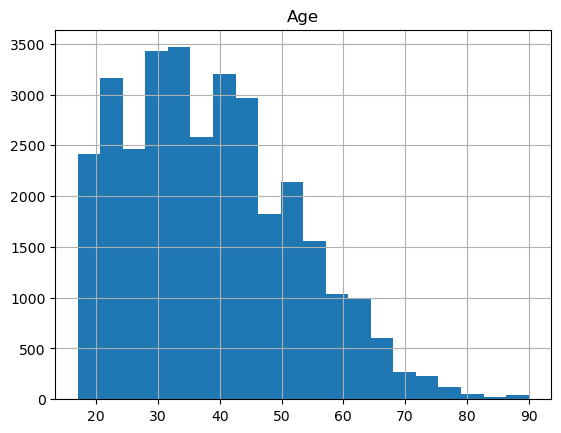

<Figure size 640x480 with 0 Axes>

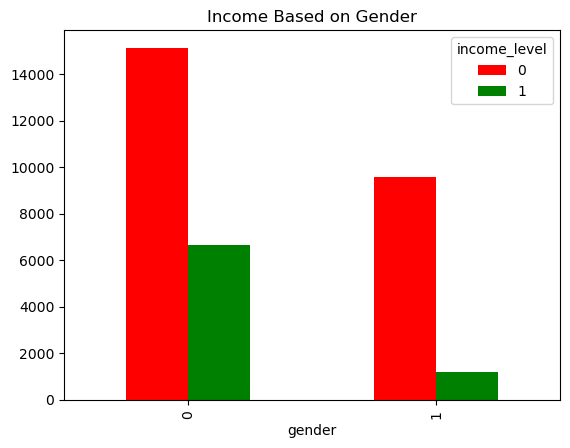

<Figure size 640x480 with 0 Axes>

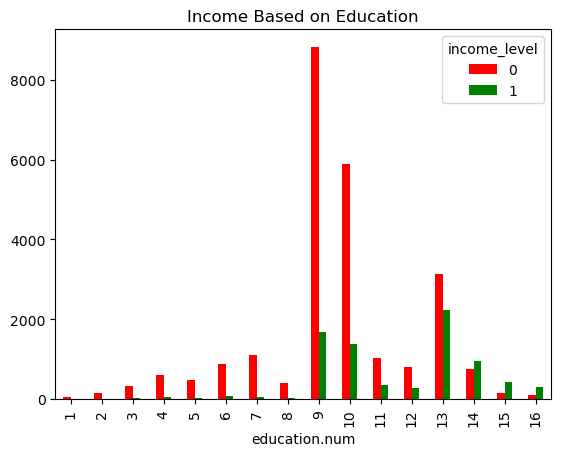

<Figure size 640x480 with 0 Axes>

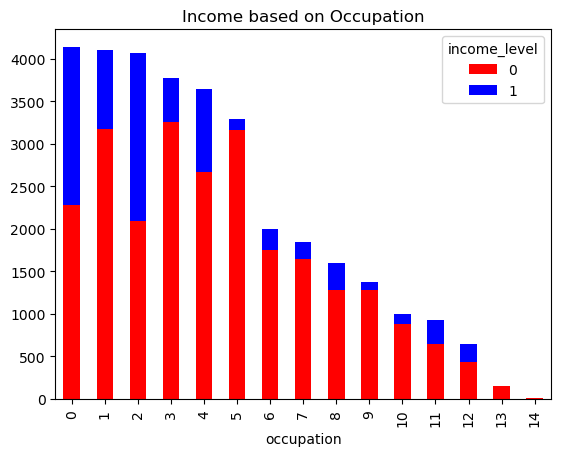

<Figure size 640x480 with 0 Axes>

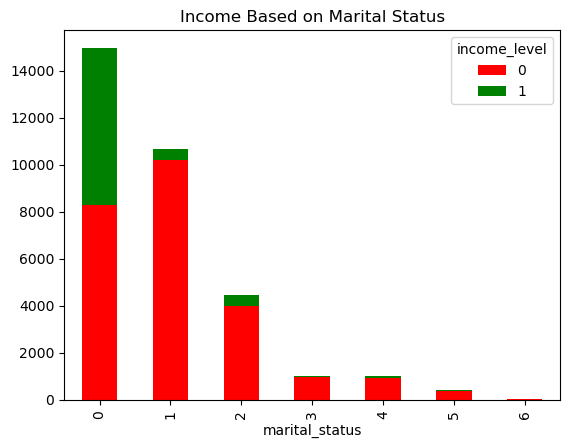

<Figure size 640x480 with 0 Axes>

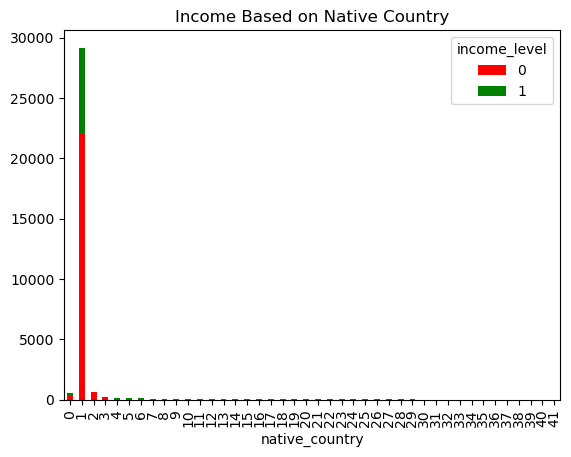

<Figure size 640x480 with 0 Axes>

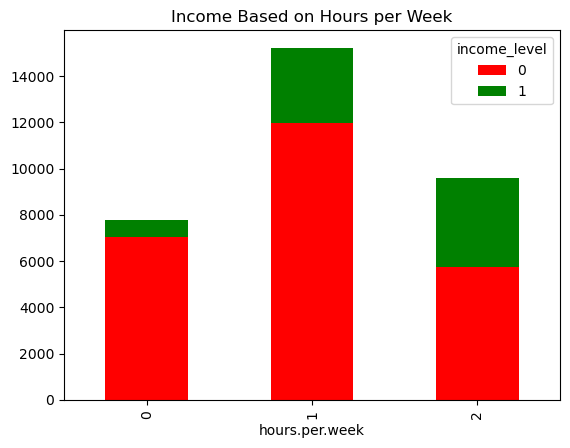

In [15]:

#make a histogram showing people's age 
ageHist = plt.figure()
plt.title('Age')
df['age'].hist(bins = 20)

#make a bar graph showing income based on gender
incomeGenderBar = plt.figure()
incomeGenderBar = pd.crosstab(df['gender'], df['income_level'])
incomeGenderBar.plot(kind = 'bar', color = ['red','green'], 
 grid = False, title = 'Income Based on Gender')

#make a bar graph showing income based on education
incomeEdBar = plt.figure()
incomeEdBar = pd.crosstab(df['education.num'], df['income_level'])
incomeEdBar.plot(kind = 'bar', color = ['red','green'], 
 grid = False, title = 'Income Based on Education')

#make a bar graph based on income and occupation
incomeOccGraph = plt.figure()
incomeOccGraph = pd.crosstab(df['occupation'], df['income_level'])
incomeOccGraph.plot(kind = 'bar', stacked = True, color = ['red', 'blue'],
 grid = False, title = 'Income based on Occupation')


#make a bar graph based on income and marital status
incomeMarriageBar = plt.figure()
incomeMarriageBar = pd.crosstab(df['marital_status'], df['income_level'])
incomeMarriageBar.plot(kind = 'bar', stacked = True, color = ['red', 'green'], 
 grid = False, title = 'Income Based on Marital Status')


#make a bar graph based on income and native country
incomeCountryBar = plt.figure()
incomeCountryBar = pd.crosstab(df['native_country'], df['income_level'])
incomeCountryBar.plot(kind = 'bar', stacked = True, color = ['red', 'green'], 
 grid = False, title = 'Income Based on Native Country')

#make a graph based on income and hours worked per week
incomeHoursBar = plt.figure()
incomeHoursBar = pd.crosstab(df['hours.per.week'], df['income_level'])
incomeHoursBar.plot(kind = 'bar', stacked = True, color = ['red', 'green'], 
 grid = False, title = 'Income Based on Hours per Week')



In [16]:
# separate orginal dataset into training and testing sets
train_old=df.sample(frac=0.8,random_state=100)
test=df.drop(train_old.index)
train = train_old.sample(frac=0.875,random_state=0) 
validation = train_old.drop(train.index)

In [17]:
def weighted_entropy(data, col_num):
    entropies = []
    n_s = []
    entropy_of_attribute = entropy(data[:,col_num])
    for value in columns[col_num]:
        candidate_child = data[data[:,col_num] == value]
        n_s.append(len(candidate_child))
        entropies.append(entropy(candidate_child[:,6]))
    n_s = np.array(n_s)
    n_s = n_s / np.sum(n_s)
    weighted_entropy = n_s.dot(entropies)
    return weighted_entropy, entropy_of_attribute
    
def entropy(data):
    classes = np.unique(data)
    n = len(data)
    n_s = []
    for class_ in classes:
        n_s.append(len(data[data==class_]))
    n_s = np.array(n_s)
    n_s = n_s/n
    n_s = n_s * np.log2(n_s)
    return max(0,-np.sum(n_s))

In [ ]:
def build_node(data, entropy, label, depth, class_="TBD", parent=None):
    new_node = dict()
    new_node['data'] = data
    new_node['entropy'] = entropy
    new_node['label'] = label
    new_node['depth'] = depth
    new_node['class'] = class_
    new_node['parent'] = parent
    new_node['children'] = []
    return new_node

root = build_node(df, entropy(df[:,6]), "all data", 0)
classes = np.unique(root['data'][:,6])
print(classes)

In [ ]:
def find_best_split(node, c45 = False):
    data = node['data']
    entropy = node['entropy']
    gains = []
    for col_num in range(len(columns) - 1):
        new_entropy, entropy_of_attribute = weighted_entropy(data, col_num)
        if c45:
            if entropy_of_attribute==0:
                gains.append(0)
            else:
                gains.append((entropy - new_entropy) / (entropy_of_attribute))
        else:
            gains.append(entropy - new_entropy)
    if np.max(gains) > 10**-3 :
        best_attribute = np.argmax(gains)
        return best_attribute
    else:
        return -1
    
def classify(node_data):
    data = node_data[:, 6]
    n_s = []
    for class_ in classes:
        n_s.append(len(data[data==class_]))
    return columns[-1][np.argmax(n_s)]
    
labels[find_best_split(root)], classify(root['data'])

In [ ]:
def build_tree(node, c45 = False, max_depth = 999, noisy=False):
    next_split_attribute = find_best_split(node, c45)
    if next_split_attribute == -1 or node['depth'] == max_depth:
        node['class'] = classify(node['data'])
        #this if statement just handles some printing of the tree (rudimentary visualization)
        if noisy:
            label = []
            label.append(node['label'])
            temp_parent = node
            while temp_parent['parent']:
                temp_parent = temp_parent['parent']
                label.append(temp_parent['label'])
            depth = node['depth']
            for i, layer_label in enumerate(reversed(label)):
                for _ in range(i):
                    print("\t", end="")
                if i==depth:
                    print("{} -> class {}".format(layer_label, node['class']))
                else:
                    print("{}".format(layer_label))
                    
    else:
        for value in columns[next_split_attribute]:
            data = node['data'][ node['data'][:, next_split_attribute] == value ]
            entropy_ = entropy(data[:, 6])
            new_node = build_node(data, entropy_, "{} == {}".format(
                                            labels[next_split_attribute],value),
                                            node['depth'] + 1, parent=node)
            build_tree(new_node, c45, max_depth, noisy)
            node['children'].append(new_node)


In [ ]:
def correct(decision_tree):
    if not decision_tree['children']:
        return np.sum(classify(decision_tree['data'])==decision_tree['data'][:,6])
    else:
        n_correct = 0
        for child in decision_tree['children']:
            n_correct += correct(child)
    return n_correct

correct(root)/1728